0.63


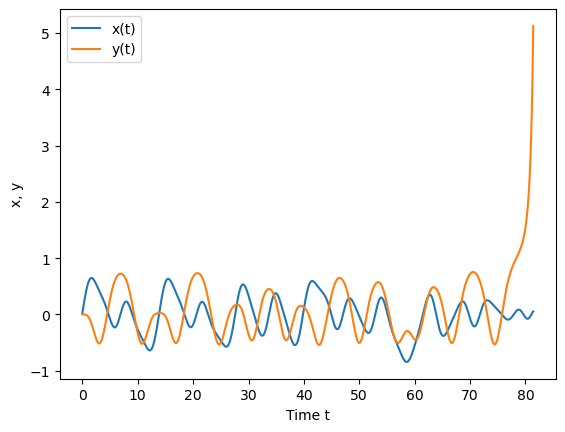

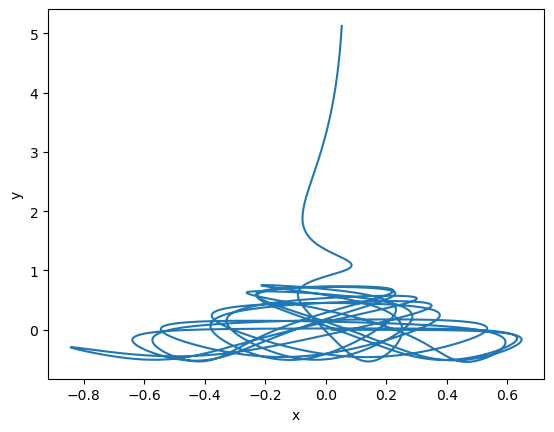

In [8]:
# Kinetic energy T = (vx^2+vy^2)/2, Potential energy V = (x^2+y^2+2*x^2*y-2*y^3/3)/2

import numpy as np
import matplotlib.pyplot as plt

x0=0.0
y0=0.0
#vx0=0.55  #np.sqrt(2.0/6.0)*0.95
vx0=0.63  #np.sqrt(2.0/6.0)*1.1
vy0=0.0
print(vx0)

def calc_dxvdt(xv):
    x,y,vx,vy = xv[0:4]
    dxdt = vx
    dydt = vy
    dvxdt = - x - 2*x*y
    dvydt = - y - x**2 + y**2
    return np.array([dxdt,dydt,dvxdt,dvydt])

def push_1st_Euler(dt,xv):
    dxvdt = calc_dxvdt(xv)
    xv = xv + dt * dxvdt
    return xv

def push_4th_Runge_Kutta(dt,xv):
    k1 = calc_dxvdt(xv)
    ww = xv + 0.5 * dt * k1
    k2 = calc_dxvdt(ww)
    ww = xv + 0.5 * dt * k2
    k3 = calc_dxvdt(ww)
    ww = xv + dt * k3
    k4 = calc_dxvdt(ww)
    xv = xv + (dt/6.0) * (k1+2*k2+2*k3+k4)
    return xv

xv = np.array([x0,y0,vx0,vy0])
dt = np.pi * 0.01
log = []
for i in range(5000):
    # xv = push_1st_Euler(dt,xv)
    xv = push_4th_Runge_Kutta(dt,xv)
    log.append(xv)
    if np.sqrt(xv[0]**2+xv[1]**2) > 5.0:
        break
log = np.array(log)
time = dt * np.arange(log.shape[0])
plt.plot(time,log[:,0],label="x(t)")
plt.plot(time,log[:,1],label="y(t)")
plt.xlabel("Time t")
plt.ylabel("x, y")
plt.legend()
plt.show()

plt.plot(log[:,0],log[:,1])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

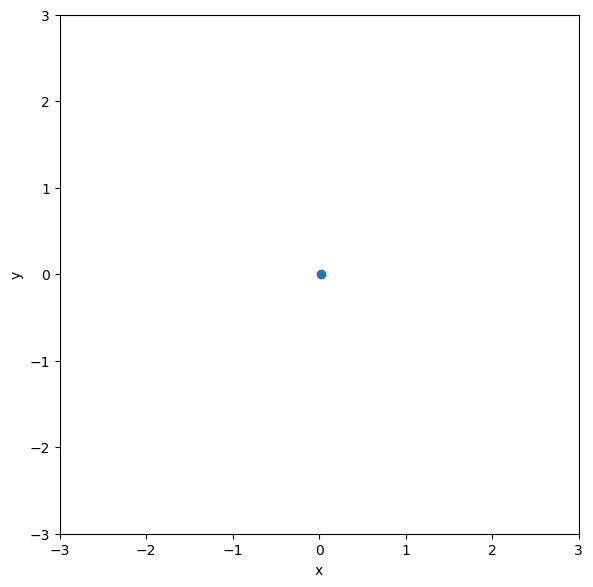

In [9]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_aspect("equal")
trajectory, = ax.plot([],[],c="Grey")
particle, = ax.plot([],[],"o")
fig.tight_layout()
def update_ax(i):
    trajectory.set_data(log[:i+1,0],log[:i+1,1])
    particle.set_data(log[i:i+1,0],log[i:i+1,1])

ani = FuncAnimation(fig, update_ax,
                    frames=range(0,log.shape[0],10), interval=50)

HTML(ani.to_jshtml())